In [54]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
## Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import TimeSeriesSplit
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
# Modelos de clasificacion
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression
## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score, log_loss
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
#import cufflinks as cf
#cf.set_config_file(offline = True)

He intentado escoger acciones con poca correlación. La explicación de ellas es:

AAPL: Apple Inc., uno de los fabricantes más grandes de tecnología de consumo, conocido por productos como el iPhone, el iPad y las MacBooks.

RELIANCE.NS: Reliance Industries Limited, una conglomerado multinacional indio que tiene negocios en diversos sectores como energía, petroquímicos, textiles, recursos naturales, y telecomunicaciones. El sufijo ".NS" indica que la acción se negocia en la National Stock Exchange of India.

BHP.AX: BHP Group Limited (anteriormente BHP Billiton), una de las compañías mineras y de recursos más grandes del mundo. El sufijo ".AX" indica que la acción se negocia en la Australian Securities Exchange.

SAN.MC: Banco Santander, S.A., un banco multinacional español y una de las mayores instituciones bancarias de la zona euro. El sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

REP.MC: Repsol, S.A., una empresa energética y petroquímica española. Al igual que SAN.MC, el sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

IBE.MC: Iberdrola, S.A., una empresa española de energía, una de las mayores productoras de energía renovable. También cotiza en la Bolsa de Madrid.

TEF.MC: Telefónica, S.A., una compañía multinacional de telecomunicaciones con sede en España. También cotiza en la Bolsa de Madrid.

Acciones con las que trabajaré: 

["AAPL", "RELIANCE.NS", "BHP.AX", "SAN.MC", "REP.MC", "IBE.MC", "TEF.MC"]

In [55]:
df = pd.read_csv("acciones_preprocesado.csv")
df

,accion,date,high,low,price,returns,direction,lag1,lag2,lag3,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,AAPL,2000-10-24,0.372768,0.335938,0.284963,-0.076468,-1.0,0.043894,0.029269,-0.060818,...,0.437500,2000,298,43,-0.866025,0.5,-0.988468,0.151428,0.781831,0.623490
1,AAPL,2000-10-25,0.342634,0.329241,0.279301,-0.020069,-1.0,-0.076468,0.043894,0.029269,...,0.415179,2000,299,43,-0.866025,0.5,-0.937752,0.347305,0.974928,-0.222521
2,AAPL,2000-10-26,0.337054,0.312500,0.279301,0.000000,0.0,-0.020069,-0.076468,0.043894,...,0.415179,2000,300,43,-0.866025,0.5,-0.848644,0.528964,0.433884,-0.900969
3,AAPL,2000-10-27,0.342634,0.319196,0.280245,0.003373,1.0,0.000000,-0.020069,-0.076468,...,0.415179,2000,301,43,-0.866025,0.5,-0.724793,0.688967,-0.433884,-0.900969
4,AAPL,2000-10-30,0.356027,0.334821,0.291568,0.039610,1.0,0.003373,0.000000,-0.020069,...,0.415179,2000,304,44,-0.866025,0.5,-0.201299,0.979530,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41652,TEF.MC,2024-02-23,3.776000,3.710000,3.776000,0.008778,1.0,0.015888,0.004625,0.011244,...,3.792000,2024,54,8,0.866025,0.5,-0.998717,-0.050649,-0.433884,-0.900969
41653,TEF.MC,2024-02-26,3.794000,3.748000,3.776000,0.000000,0.0,0.008778,0.015888,0.004625,...,3.794000,2024,57,9,0.866025,0.5,-0.848644,0.528964,0.000000,1.000000
41654,TEF.MC,2024-02-27,3.815000,3.751000,3.810000,0.008964,1.0,0.000000,0.008778,0.015888,...,3.815000,2024,58,9,0.866025,0.5,-0.724793,0.688967,0.781831,0.623490
41655,TEF.MC,2024-02-28,3.874000,3.814000,3.828000,0.004713,1.0,0.008964,0.000000,0.008778,...,3.874000,2024,59,9,0.866025,0.5,-0.571268,0.820763,0.974928,-0.222521


Lo primero que voy a hacer es transformar la fecha para poder meterla como variable numérica 

Ahora voy a separar los data frames en:
1.- variables categóricas para hacerle onehotencoding
2.- variables numéricas para aplicarle escaladores
3.- variables seno y cosenoidales que no se transforman ya más
4.- variable objetivo (dirección)

In [56]:
df_cat = df[["accion"]].copy()
columns_to_copy = [col for col in df.columns if col.startswith('sin') or col.startswith('cos')]
df_sincos = df[columns_to_copy].copy()
columns_to_exclude = columns_to_copy + ["accion", "direction", "date"]
columns_to_select = [col for col in df.columns if col not in columns_to_exclude]
df_num = df[columns_to_select].copy()
df_dir = df[["direction"]].copy()

Empiezo haciendo one hot encoding sobre la única variable tipo texto que tengo. El nombre de la acción

In [57]:
# drop_first para evitar la colinealidad
df_cat = pd.get_dummies(df_cat, columns=["accion"], drop_first = False).astype(int)
df_cat 


,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
41652,0,0,0,0,0,0,1
41653,0,0,0,0,0,0,1
41654,0,0,0,0,0,0,1
41655,0,0,0,0,0,0,1


Ahora aplico escaladores sobre las variables numéricas

Ahora ya tengo el df de categóricas con onehotencoding y las numéricas con los datos escalados. Por tanto los quiero volver a unir y juntar también con las variables seno y cosenoidales. Y tener solo separada la variable objetivo

In [58]:
# Aplicar el escalador a los datos
X_scaled = pd.DataFrame(StandardScaler().fit_transform(df_num.copy()), columns=df_num.columns)  
data = pd.concat([df_cat, df_sincos, X_scaled, df_dir], axis=1)
cols = [col for col in data.columns if col != "direction"]


In [59]:
lm = LogisticRegression(C=1e6, max_iter=100000, multi_class="ovr")
lm.fit(data[cols], data.direction)
data["prediction"] = lm.predict(data[cols])

In [60]:
# Opción 2
'''
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    data, df_dir, df_dir.index, test_size=0.2, shuffle=False)

# Entrenar el modelo
model = LogisticRegression(C=1e6, max_iter=100000, multi_class="ovr")
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
'''

'\nX_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(\n    data, df_dir, df_dir.index, test_size=0.2, shuffle=False)\n\n# Entrenar el modelo\nmodel = LogisticRegression(C=1e6, max_iter=100000, multi_class="ovr")\nmodel.fit(X_train, y_train)\n\n# Realizar predicciones en el conjunto de prueba\npredictions = model.predict(X_test)\n'

In [61]:
data.prediction.value_counts()

prediction
 1.0    21064
-1.0    19847
 0.0      746
Name: count, dtype: int64

In [62]:
hits = np.sign(data.prediction * data.direction).value_counts()
hits

1.0    40797
0.0      860
Name: count, dtype: int64

In [63]:
accuracy_score(y_true=df_dir, y_pred=data.prediction)

0.9972393595314113

In [64]:
apple = data["accion_AAPL"] == 1
apple = data[apple]
apple

,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC,sin_month,cos_month,sin_day,...,sma_upper200,ema_s,ema_l,roll_low,roll_high,year,day_of_year,week_of_year,direction,prediction
0,1,0,0,0,0,0,0,-0.866025,0.5,-0.988468,...,-0.294432,-0.291635,-0.291491,-0.309472,-0.312153,-1.763322,1.083333,1.084397,-1.0,-1.0
1,1,0,0,0,0,0,0,-0.866025,0.5,-0.937752,...,-0.294419,-0.291658,-0.291526,-0.309472,-0.312213,-1.763322,1.092791,1.084397,-1.0,-1.0
2,1,0,0,0,0,0,0,-0.866025,0.5,-0.848644,...,-0.294407,-0.291677,-0.291558,-0.309514,-0.312213,-1.763322,1.102249,1.084397,0.0,0.0
3,1,0,0,0,0,0,0,-0.866025,0.5,-0.724793,...,-0.294395,-0.291693,-0.291587,-0.309514,-0.312213,-1.763322,1.111707,1.084397,1.0,1.0
4,1,0,0,0,0,0,0,-0.866025,0.5,-0.201299,...,-0.294384,-0.291701,-0.291612,-0.309514,-0.312213,-1.763322,1.140081,1.150615,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,1,0,0,0,0,0,0,0.866025,0.5,-0.998717,...,0.213899,0.224956,0.232355,0.215350,0.195206,1.782017,-1.224431,-1.233233,-1.0,-1.0
5869,1,0,0,0,0,0,0,0.866025,0.5,-0.848644,...,0.213782,0.223533,0.231318,0.215350,0.195206,1.782017,-1.196057,-1.167015,-1.0,-1.0
5870,1,0,0,0,0,0,0,0.866025,0.5,-0.724793,...,0.213720,0.222964,0.230665,0.214065,0.195206,1.782017,-1.186599,-1.167015,1.0,1.0
5871,1,0,0,0,0,0,0,0.866025,0.5,-0.571268,...,0.213650,0.221960,0.229807,0.214065,0.192384,1.782017,-1.177141,-1.167015,-1.0,-1.0


In [65]:
apple.price

0      -0.291584
1      -0.291600
2      -0.291600
3      -0.291597
4      -0.291566
          ...   
5868    0.217356
5869    0.213558
5870    0.217663
5871    0.214284
5872    0.212413
Name: price, Length: 5873, dtype: float64

In [13]:
data["strategy"] = data.prediction * data.returns
data["Creturns"] = data.returns.cumsum().apply(np.exp)
data["Cstrategy"] = data.Creturns.cumsum().apply(np.exp)

In [14]:
data[["price", "returns", "Creturns", "strategy", "Cstrategy"]].head(20)

,price,returns,Creturns,strategy,Cstrategy
0,-0.291584,-3.774634,0.022945,3.774634,1.023211e+00
1,-0.291600,-1.004890,0.008400,1.004890,1.031842e+00
2,-0.291600,-0.019284,0.008240,-0.000000,1.040379e+00
3,-0.291597,0.146346,0.009538,0.146346,1.050350e+00
4,-0.291566,1.925951,0.065447,1.925951,1.121392e+00
5,-0.291555,0.612324,0.120731,0.612324,1.265290e+00
6,-0.291516,2.279541,1.179810,2.279541,4.116946e+00
7,-0.291439,4.141545,74.209995,4.141545,6.975360e+32
8,-0.291442,-0.157156,63.417706,0.157156,2.429554e+60
9,-0.291476,-1.846068,10.010909,1.846068,5.410146e+64


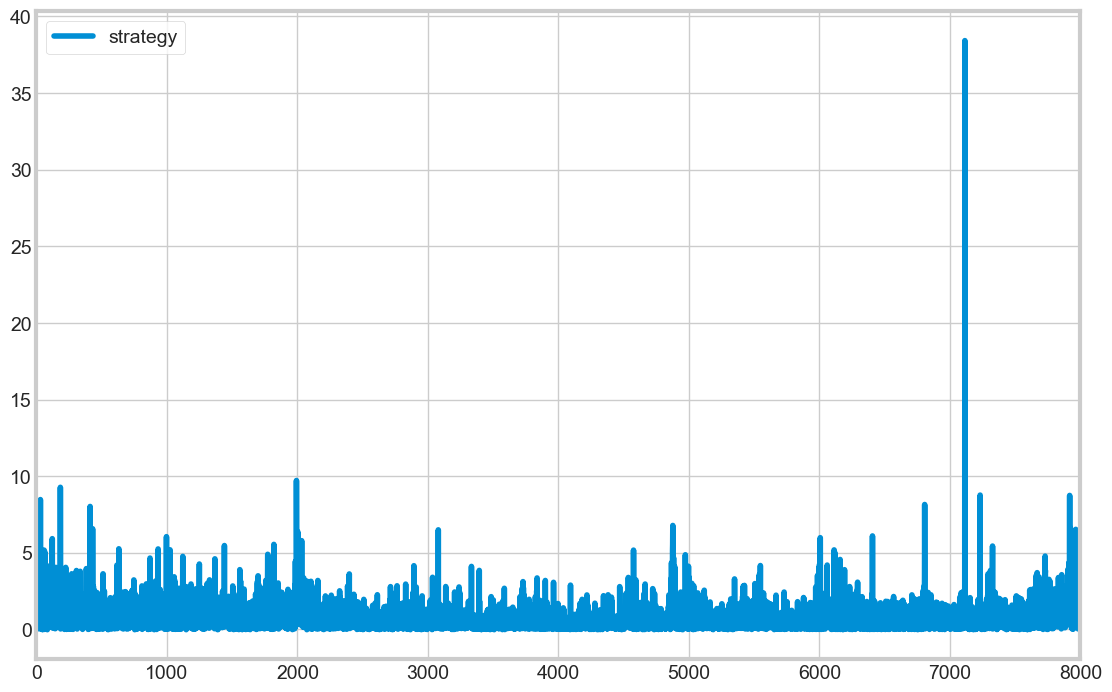

In [24]:
data[["strategy"]].plot(figsize=(12, 8))
plt.xlim(0, 8000)
plt.show()